In [42]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [43]:
imgName = '2.jpg'

name = imgName.split('.')[0]
ext = imgName.split('.')[1]
outName = name+'_Out.'+ext

In [44]:
def printImg(img,inDisplay = False,gray = False):
    temp_img = img
    #temp_img = cv2.resize(img,(650,300))
    if inDisplay:
        if gray:
            plt.imshow(temp_img,cmap=plt.cm.gray)
        else:
            plt.imshow(temp_img)
        return
    cv2.imshow('Output',temp_img)
    cv2.waitKey(0)

In [45]:
def highlightMask(img,mask):
    tempImg = img.copy()
    tempMask = mask.copy()
    
    tempMask = cv2.cvtColor(tempMask, cv2.COLOR_GRAY2BGR)
    tempImg[np.where((tempMask==[255,255,255]).all(axis=2))] = [0,255,0]
    return tempImg

In [46]:
# It will read image in BGR form
# 0 --> Black
# 1 --> White
img = cv2.imread(imgName)
print(img.shape)
#printImg(img)

(241, 319, 3)


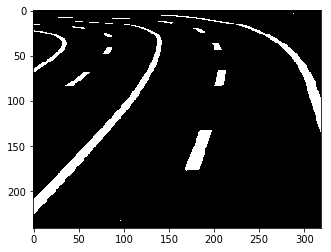

In [47]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
#print(gray.shape)
# Thresholding arguments --> (grayscale image, threshold value, maxVal, type)
# ret, thresh = cv2.threshold(gray,250,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret, thresh = cv2.threshold(gray,170,255,cv2.THRESH_BINARY)
#print(thresh.shape)
printImg(thresh,True,True)

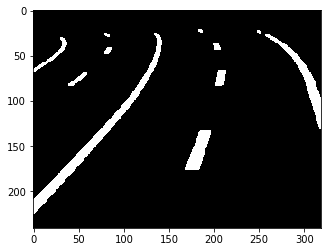

In [48]:
# Noise Removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 1)
printImg(opening,True,True)

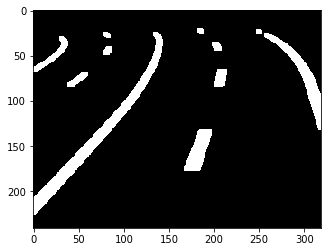

In [49]:
# Sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=1)
printImg(sure_bg,True,True)

In [53]:
# Sure foreground area
sure_fg = cv2.erode(opening,kernel,iterations=1)
#printImg(sure_fg,True,True)

# Finding unknown region
unknown = cv2.subtract(sure_bg,sure_fg)
printImg(unknown)

In [51]:
out = highlightMask(img,unknown)
cv2.imwrite(outName,out)

True